# Introduction
<hr style="border:2px solid black"> </hr>


**What?** SVD Singular Value Decomposition



# Intro on SVD
<hr style="border:2px solid black"> </hr>


- SVD is more stable than EVD Eigen Value Decomposition and it might be the most popular technique for dimensinality reduction when data is SPARSE. 
- The SVD is used widely both  in the calculation of other matrix operations, such as matrix inverse, but also as a  data reduction method in machine learning



# Import modules
<hr style="border:2px solid black"> </hr>

In [4]:
from numpy import diag, dot
from numpy import array
from numpy import zeros
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# General introduction on SVD
<hr style="border:2px solid black"> </hr>

In [25]:
# Define of a general matrix
A = array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]])
print("Original matrix shape: ", A.shape)
print("Original matrix: \n", A)

# Factorize via SVD
U, s, V = svd(A)
print("Number of of values: ", len(s))

# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)

# Select the two top -k largest values,
# Essentially it means we are interested in the two first and most important features
n_elements = 2
Sigma = Sigma[:, :n_elements]
V = V[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(V))
print("Reconstructing the original matrix: \n", B)
print("reconstruction error: \n", abs(A-B))

"""
In practice, we can retain and work with a descriptive subset of the data called T. 
This is a dense summary of the matrix or a projection. Below there are two cases
ways of doing it, which follows form the definition
"""
# transform
T = U.dot(Sigma)
print(T)
T = A.dot(V.T)
print(T)

Original matrix shape:  (3, 10)
Original matrix: 
 [[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
Number of of values:  3
Reconstructing the original matrix: 
 [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
reconstruction error: 
 [[2.22044605e-16 2.22044605e-16 1.33226763e-15 2.66453526e-15
  2.66453526e-15 4.44089210e-15 5.32907052e-15 5.32907052e-15
  7.10542736e-15 5.32907052e-15]
 [8.88178420e-15 5.32907052e-15 3.55271368e-15 1.77635684e-15
  3.55271368e-15 3.55271368e-15 3.55271368e-15 3.55271368e-15
  0.00000000e+00 3.55271368e-15]
 [1.42108547e-14 7.10542736e-15 3.55271368e-15 0.00000000e+00
  0.00000000e+00 3.55271368e-15 3.55271368e-15 7.10542736e-15
  3.55271368e-15 7.10542736e-15]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276 

In [28]:
"""
The scikit-learn provides a TruncatedSVD class that implements this capability directly. 
The TruncatedSVD class can be created in which you must specify the number of desirable 
features or components to select, e.g. 2.
"""
# create transform
svd = TruncatedSVD(n_components=2)
# fit transform
svd.fit(A)
# apply transform
result = svd.transform(A)
print(result)


[[18.52157747  6.47697214]
 [49.81310011  1.91182038]
 [81.10462276 -2.65333138]]


# SVD and logistic regression
<hr style="border:2px solid black"> </hr>

In [3]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=7)

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())] 
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.034)


# Tuning the number of dimensionality reduction
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
How do we know that reducing 20 dimensions of input down to 10 is good or the best we can do? We don’t; 
10 was an arbitrary choice. A better approach is to evaluate the same transform and model with different 
numbers of input features and choose the number of features (amount of dimensionality reduction) that 
results in the best average performance.
"""

In [5]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,20):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.542 (0.046)
>2 0.626 (0.050)
>3 0.719 (0.053)
>4 0.722 (0.052)
>5 0.721 (0.054)
>6 0.729 (0.045)
>7 0.802 (0.034)
>8 0.800 (0.040)
>9 0.814 (0.037)
>10 0.814 (0.034)
>11 0.817 (0.037)
>12 0.820 (0.038)
>13 0.820 (0.036)
>14 0.825 (0.036)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)


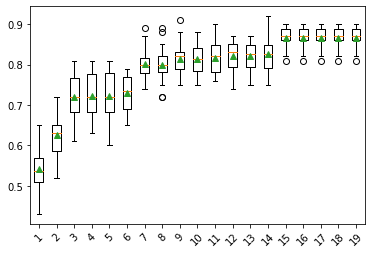

In [6]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:
"""
We can see a general trend of increased performance as the number of dimensions is increased. On this dataset,
the results suggest a trade-off in the number of dimensions vs. the classification accuracy of the model. 
Interestingly, we don’t see any improvement beyond 15 components. This matches our definition of the problem
where only the first 15 components contain information about the class and the remaining five are redundant.
"""

# SVD reduction and logistic regression
<hr style="border:2px solid black"> </hr>

In [8]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=7)

# define the model
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())] 
model = Pipeline(steps=steps)

# fit the model on the whole dataset
model.fit(X, y)

# make a single prediction
row = [[0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
    0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
    3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]

yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [ ]:
"""
Here, the transform uses the 15 most important components from the SVD transform, as we found from testing above.
A new row of data with 20 columns is provided and is automatically transformed to 15 components and fed to the 
logistic regression model in order to predict the class label.
"""